# Test of median ice edge plots

In [63]:
import numpy as np
import xarray as xr
import datetime

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs

In [96]:
model_names        = ['CanESM2', 'CESM1', 'CSIRO_MK36',  'GFDL_CM3', 'GFDL_ESM2M', 'MPI_ESM1']
model_print_names  = ['CanESM2', 'CESM1', 'CSIRO MK3.6', 'GFDL CM3', 'GFDL ESM2M', 'MPI ESM1']
obs_names          = ['HadISST1']
mem_len   = [50,  40,  30,  20,  30,  100]
start_yrs = [1950,1920,1850,1920,1950,1850]
colors_   = ['m', 'b', 'g', 'orange', 'k', 'tab:olive']

In [53]:
def circular_polar_plot(data, lat_min, colors, title_, no_col_bar=False, 
                        cbar_label=False, levels_=False, cbar_levels_=False, 
                        extend_kw=False, horizontal=False):
    
    '''
    This function requires an input of an xarray dataarray with lat/lon and a third varaible
    '''
    
    #define the overall figure charachteristics
    fig = plt.figure(figsize=[8,8]) #set the size of the figure
    ax = fig.add_subplot(projection = ccrs.NorthPolarStereo(central_longitude=0)) #define the axes in terms of the polar projection
    ax.set_extent((-180,180,int(lat_min),90), ccrs.PlateCarree()) #only include data above the minimum latitude
    
    #make the plot circular using matplotlib.path
    theta = np.linspace(0, 2*np.pi, 100) 
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T #matrix transpose
    circle = mpath.Path(verts * radius + center) #this is now a circle boundary defined in matplotlib
    ax.set_boundary(circle, transform=ax.transAxes) #cut the plot at the circle boundary
    
    if no_col_bar: #we don't include a colorbar if this argument is True
        data.plot(ax=ax,cmap=str(colors), add_colorbar=False, add_labels=False, transform=ccrs.PlateCarree())
    else:
        fig.subplots_adjust(right=0.87) #make space at the right side of the plot for the colorbar
        plotting = data.plot(ax=ax, cmap=str(colors), add_colorbar=False, transform=ccrs.PlateCarree(), levels=levels_, add_labels=False)

        ####################################### define the colorbar ############################################
        if horizontal: #=True means we want the colobar horizontal
            orient = 'horizontal'
            cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.04]) #this is x,y position of the colorbar and length and height
        else:
            orient = 'vertical'
            cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
        
        #define whether the colorbar should be capped, default if no 'extend_kw' keyword is for both caps to be there so 'extend=both'
        if extend_kw:
             cb = fig.colorbar(plotting, cax=cbar_ax, ticks=cbar_levels_, spacing='uniform', extend=extend_kw, orientation=orient)
        else:
             cb = fig.colorbar(plotting, cax=cbar_ax, ticks=cbar_levels_, spacing='uniform', extend='both', orientation=orient)
        
        #set the label and label size of the colorbar
        if horizontal:
            cb.ax.set_xlabel(str(cbar_label), fontsize=20)
        else:
            cb.ax.set_ylabel(str(cbar_label), fontsize=20)
    
        cb.ax.tick_params(labelsize=20) #set the tick size on the colobar
        #####################################################################################################
    
    #add details to the figure after the data is plotted
    ax.coastlines() #add coastlines
    ax.gridlines() #add gridlines
    ax.set_title(str(title_), fontsize=20) #set the title and fontzise
    ax.set_facecolor('0.5') #make the background (usually land) gray

In [5]:
CanESM2_09 = xr.open_dataarray('/Users/chwy8767/Downloads/Reduced_datasets/CanESM2_reduced_1979-2020_09.nc')

In [22]:
extent_ones = CanESM2_09.where(CanESM2_09>=15, 0)

In [24]:
extent_ones = extent_ones.where(extent_ones==0, 1)

In [30]:
extent_totals = extent_ones.sum('member').sum('time')

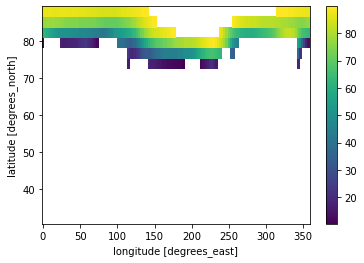

In [55]:
(extent_totals.where(np.logical_and(extent_totals>(42*5), extent_totals<(42*45)))/(42*0.5)).plot()

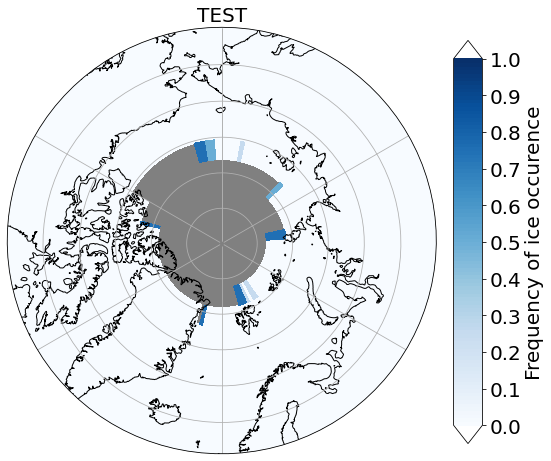

In [136]:
model_name = 'CanESM2'
month_ = 9

circular_polar_plot(median_SIE(model_name, month_), 60, 'Blues', 'TEST',
                    cbar_label='Frequency of ice occurence', levels_=np.arange(0,1.01,0.01), cbar_levels_=np.arange(0,1.01,0.1))

In [194]:
def median_plots(data, lat_min, col, title_):
    
    '''
    This function requires an input of an xarray dataarray with lat/lon and a third varaible
    '''
    
    #define the overall figure charachteristics
    fig = plt.figure(figsize=[8,8]) #set the size of the figure
    ax = fig.add_subplot(projection = ccrs.NorthPolarStereo(central_longitude=0)) #define the axes in terms of the polar projection
    ax.set_extent((-180,180,int(lat_min),90), ccrs.PlateCarree()) #only include data above the minimum latitude
    
    #make the plot circular using matplotlib.path
    theta = np.linspace(0, 2*np.pi, 100) 
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T #matrix transpose
    circle = mpath.Path(verts * radius + center) #this is now a circle boundary defined in matplotlib
    ax.set_boundary(circle, transform=ax.transAxes) #cut the plot at the circle boundary
    
#     plt.contour(data, axes=ax, colors=col, add_colorbar=False, add_labels=False, transform=ccrs.PlateCarree())
    ax.contour(data, colors=col, levels=[0.99,1], transform=ccrs.PlateCarree())
    
    #add details to the figure after the data is plotted
    ax.coastlines() #add coastlines
    ax.gridlines() #add gridlines
    ax.set_title(str(title_), fontsize=20) #set the title and fontzise
    ax.set_facecolor('0.5') #make the background (usually land) gray

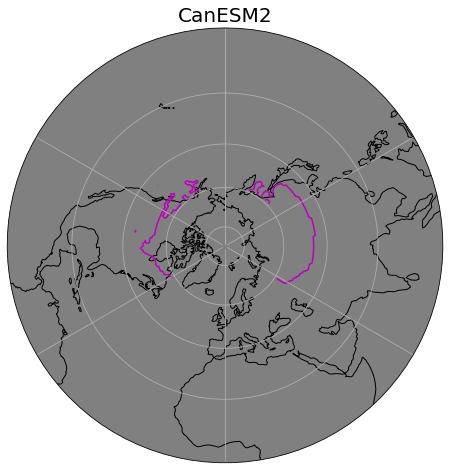

In [198]:
median_plots(median_SIE('GFDL_CM3', 9), 0, 'm', 'CanESM2')

In [182]:
median_SIE('CanESM2', 9).values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [120]:
def median_SIE(model_name, month_):
    month_data = xr.open_dataarray('/Users/chwy8767/Downloads/Reduced_datasets/{}_reduced_1979-2020_{}.nc'.format(model_name, str(month_).zfill(2)))
    extent_ones = month_data.where(month_data>=15, 0)
    extent_ones = extent_ones.where(extent_ones==0, 1)
    extent_medians = extent_ones.median('member').median('time')
    
    return(extent_medians)

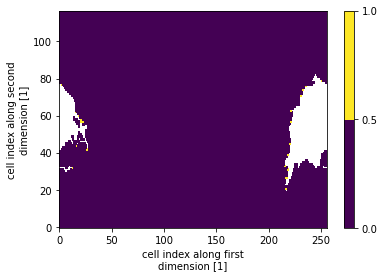

In [133]:
median_SIE(model_name, month_).plot(levels=[0,0.5,1])

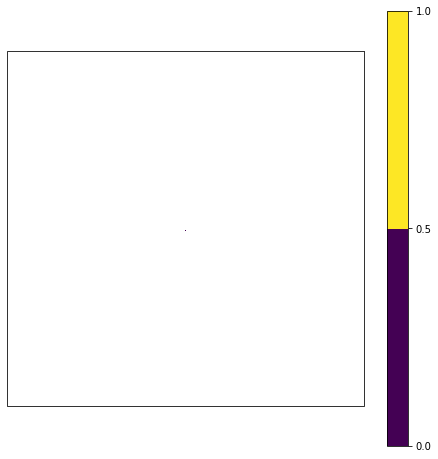

In [131]:
lat_min = 60

fig = plt.figure(figsize=[8,8]) #set the size of the figure
ax = fig.add_subplot(projection = ccrs.NorthPolarStereo(central_longitude=0)) #define the axes in terms of the polar projection
ax.set_extent((-180,180,lat_min,90), ccrs.PlateCarree()) #only include data above the minimum latitude

median_SIE(model_name, month_).plot(ax=ax, levels=[0,0.5,1])

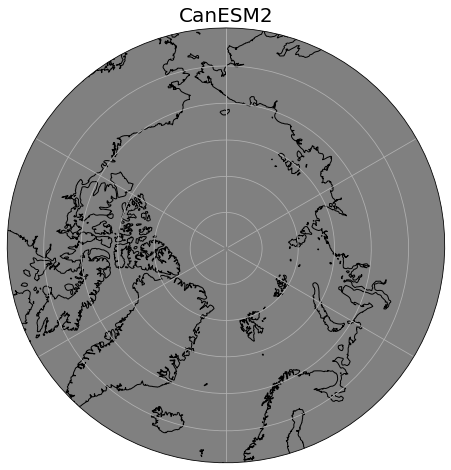

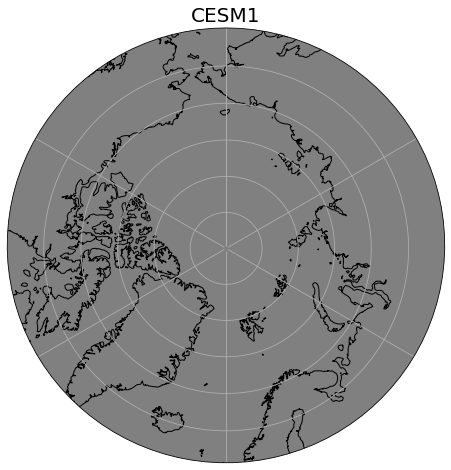

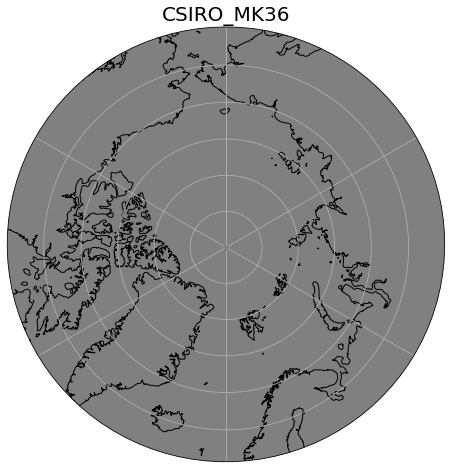

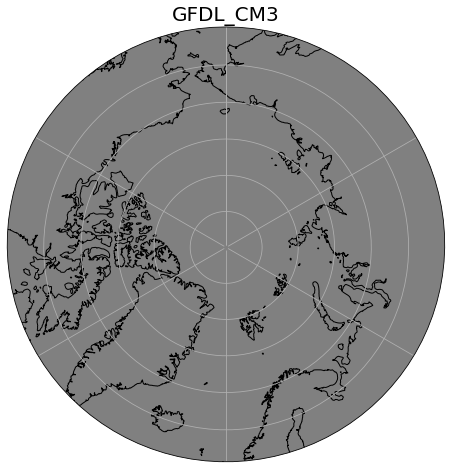

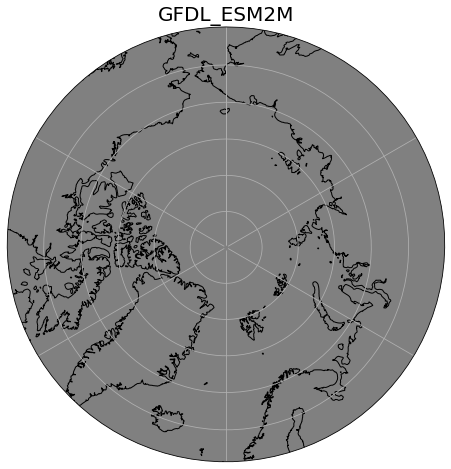

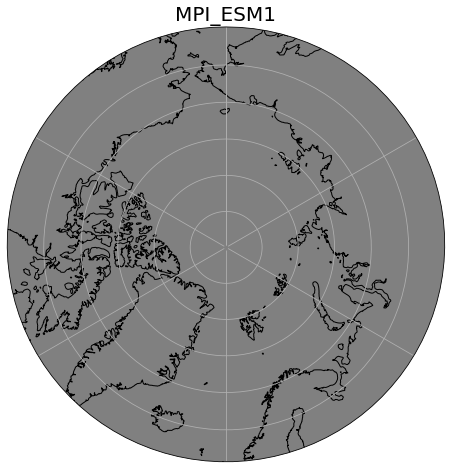

In [124]:
month_ = 9
for model_i, model_name in enumerate(model_names):
    median_plots(median_SIE(model_name, month_), 60, colors_[model_i], model_name)

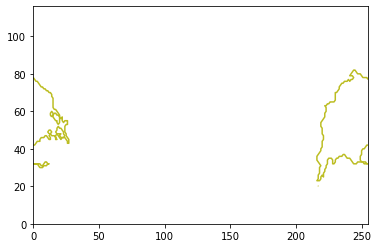

In [100]:
median_plots(data, lat_min, col, title_, no_col_bar=False, 
                 cbar_label=False, levels_=False, cbar_levels_=False, 
                 extend_kw=False, horizontal=False)

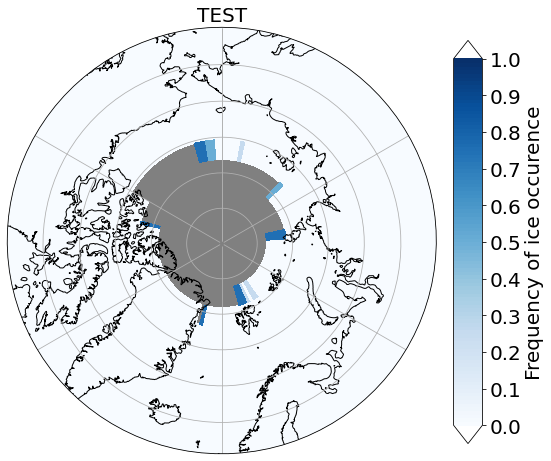

In [77]:
circular_polar_plot(extent_medians, 60, 'Blues', 'TEST',
                    cbar_label='Frequency of ice occurence', levels_=np.arange(0,1.01,0.01), cbar_levels_=np.arange(0,1.01,0.1))